## Sample NN for binary classification

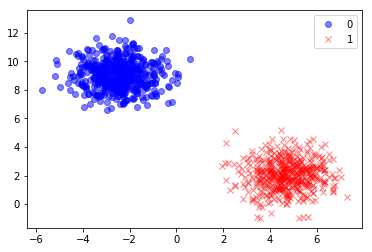

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os


#helper funtions
def plot_data(p1,X,y) :
    p1.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5) #plotting where y==0
    p1.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5) #plotting where y==1
    
    p1.legend(['0','1'])
    return p1
#lets populate X,y

X,y=make_blobs(n_samples=1000,centers=2,random_state=42)


pl=plot_data(plt,X,y)
pl.show()


In [15]:
#now lets split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [17]:
#create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #will do the back prop to optimize the model

#Generalized Pattern for the Sequential Model is
    
    ##Create Model##
model= Sequential() #simple Sequential Model(layers are added one after the other)
    
    ##Add Layers##
model.add(Dense(1,input_shape=(2,),activation="sigmoid"))#'1'- 0ne neuron/
    #'input_shape=(2,)'means that we are inputting (x,y) data pairs
    #'activation="sigmoid"' is the activation function of the neuron
    
    ##Compile Model##
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])
    #'Adam(lr=0.05)' is used to minimize the error
    #'binary_crossentropy' function is used to calculate the loss
    #'metrics=['accuracy']' is the metric we want to optimize
    
    ##Train Model##
model.fit(X_train,y_train,epochs=100,verbose=0)
    #'epochs=100' how many times your are running through the data
    
    ##Evaluate Performance##
eval_result=model.evaluate(X_test,y_test)
    
print("\n\nTest Loss:",eval_result[0],"Test Accuracy :",eval_result[1])
    


300/300 [==============================] - 0s 304us/step


Test Loss: 9.53826034189e-05 Test Accuracy : 1.0


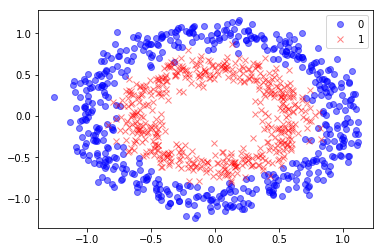

300/300 [==============================] - 1s 2ms/step


Test Loss: 0.524494247834 Test Accuracy : 0.719999999205


In [45]:
#making the data mapped in a more complex pattern
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os


#helper funtions
def plot_data(p1,X,y) :
    p1.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5) #plotting where y==0
    p1.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5) #plotting where y==1
    
    p1.legend(['0','1'])
    return p1
#lets populate X,y

X,y=make_circles(n_samples=1000,factor=0.6,noise=0.1,random_state=42)


pl=plot_data(plt,X,y)
pl.show()

#now lets split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


#create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #will do the back prop to optimize the model

#Generalized Pattern for the Sequential Model is
    
    ##Create Model##
model= Sequential() #simple Sequential Model(layers are added one after the other)
    
    ##Add Layers##    
model.add(Dense(1,input_shape=(2,),activation="tanh"))
    #'1'- 0ne neuron/
    #'input_shape=(2,)'means that we are inputting (x,y) data pairs
    #'activation="sigmoid"' is the activation function of the neuron
#model.add(Dense(10,activation="tanh"))
model.add(Dense(5,activation="relu"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
    ##Compile Model##
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])
    #'Adam(lr=0.05)' is used to minimize the error
    #'binary_crossentropy' function is used to calculate the loss
    #'metrics=['accuracy']' is the metric we want to optimize
    
    ##Train Model##
model.fit(X_train,y_train,epochs=480,verbose=0)
    #'epochs=100' how many times your are running through the data
    
    ##Evaluate Performance##
eval_result=model.evaluate(X_test,y_test)
    
print("\n\nTest Loss:",eval_result[0],"Test Accuracy :",eval_result[1])
    


# Hidden Layers vs Decision boundaries

## 0-only represent linearly seperable
## 1-continuos mapping from one finite space to another
## 2-can represent arbitrary decision boundary
## 3-addition layers can learn complex represention

In [114]:
#making the data mapped in a more complex pattern
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
tk = Tokenizer()
tkt = Tokenizer()

#helper funtions
def plot_data(p1,X,y) :
    p1.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5) #plotting where y==0
    p1.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5) #plotting where y==1
    
    p1.legend(['0','1'])
    return p1
#lets populate X,y
#X,y=make_circles(n_samples=1000,factor=0.6,noise=0.1,random_state=42)
#get the training data
original_training=pd.read_csv(".\\ADvsHCFourier.csv")
original_training.head(10)
X_train=original_training.copy()

del X_train['class']
del X_train['experiment']
X_train.head()
#print(X_train)
tk.fit_on_texts(X_train)
index_list = tk.texts_to_sequences(X_train)
x_train = pad_sequences(index_list, maxlen=304)
#print(len(x_train))
y_train = []

for data in original_training ['class']:
    y_train.append(data)

encoder = LabelEncoder()
encoder.fit(y_train)
Y_train = encoder.transform(y_train)
    
#print(y_train)    
#getting the test dataset
test_data= pd.read_csv(".\\ADvsHCFourier_test.csv")
X_test=test_data.copy()
del X_test['class']
del X_test['experiment']
X_test.head(8)
tkt.fit_on_texts(X_test)
index_list_test = tkt.texts_to_sequences(X_test)
x_test = pad_sequences(index_list_test, maxlen=304)
#print(len(x_test))
y_test=[]
for t_data in test_data ['class']:
    y_test.append(t_data)

encoder1 = LabelEncoder()
encoder1.fit(y_test)
Y_test = encoder.transform(y_test)
    
#print(Y_test)    


In [117]:
#create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #will do the back prop to optimize the model

#Generalized Pattern for the Sequential Model is
    
    ##Create Model##
model= Sequential() #simple Sequential Model(layers are added one after the other)
    
    ##Add Layers##    
model.add(Dense(60,activation="relu",kernel_initializer='uniform',input_dim=304))
    #'1'- 0ne neuron/
    #'input_shape=(2,)'means that we are inputting (x,y) data pairs
    #'activation="sigmoid"' is the activation function of the neuron
#model.add(Dense(10,activation="tanh"))
model.add(Dense(150,kernel_initializer='normal',activation="relu"))
model.add(Dense(80,kernel_initializer='normal',activation="relu"))
model.add(Dense(30,kernel_initializer='normal',activation="relu"))
model.add(Dense(1,kernel_initializer='normal',activation="sigmoid"))
    ##Compile Model##
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])
    #'Adam(lr=0.05)' is used to minimize the error
    #'binary_crossentropy' function is used to calculate the loss
    #'metrics=['accuracy']' is the metric we want to optimize
    
   

In [119]:
 ##Train Model##
model.fit(X_train,Y_train,epochs=480,verbose=0)
    #'epochs=100' how many times your are running through the data
    
    ##Evaluate Performance##
eval_result=model.evaluate(X_test,Y_test)
    
print("\n\nTest Loss:",eval_result[0],"Test Accuracy :",eval_result[1]*100)
    


11/11 [==============================] - 1s 64ms/step


Test Loss: 14.6528139114 Test Accuracy : 9.09090936184
